# RAIN AUSTRALIA PREDICTION

# GENERAL INTRODUCTION

The Pima are a group of Native Americans living in central and Southern Arizona. A genetic predisposition allowed this group to survive normally to a diet with lowlevel of carbohydrates during history. However, nowadays, because of the decline in physical activity associated with a sudden shift from traditional agricultural crops to processed food made them obtain the highest prevalence of type 2 diabetes and for this reason they have been the subject of many researchs.

This project is another simple approach, which helps reduce the complexity leading to expensive costs in Medicine in quick type II diabetes prediction using 8 characteristics: 

(1) Number of times pregnant, 

(2) Plasma glucose concentration a 2 hours in an oral glucose tolerance test, 

(3) Diastolic blood pressure (mm Hg), 

(4) Triceps skin fold thickness (mm), 

(5) 2-Hour serum insulin (mu U/ml), 

(6) Body mass index (weight in kg/(height in m)^2), 

(7) Diabetes pedigree function, 

(8) Age (years)

The target column 'Outcome' indicates whether a person diagnosed with type II diabetes or not, '1' : Positive, '0' : Negative

# SOURCES

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
You can downloaded from this address:https://www.kaggle.com/uciml/pima-indians-diabetes-database

# PROBLEM APPROACH

**The type of dataset and problem is a classic supervised binary classification**

With 768 elements all with certain attributes, we want to build a machine learning model to identify people affected by type 2 diabetes.
To solve the problem we will have to: firstly, inspect the data then cleaning it, do any required transformation and normalisation, apply a machine learning algorithms and using cross validation; after finding the best model, we train it, reset parameter, especially in this project, since the Logistic Regression is the best model, we modify it threshold and choosing which penalty (Ridge/Lasso) is most efficient advoid overfitting. Then check the performance of the final model with a 'made-up' information.

# OUTLINE

***I) DATA INSPECTION:***

1) IMPORT LIBRARIES AND DATASET

2) GENERAL DESCRIPTION

3) VISUALIZATION OF DATASET

***II) DATA CLEANING AND TRANSFORMATION***

1) DEALING WITH NULL VALUE

2) DEALING WITH OUTLIERS

3) FEATURE SCALING

***III) TESTING MULTIPLE MODELS***

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

***IV) BUILDING THE BEST MODEL FOR PREDICTION***

1) ANALYSIS OF 2 MODELS: CONFUSION MATRIX AND CLASSIFICATION REPORT

2) FINDING THE BEST MODEL:

A- LINEAR DISCRIMINANT ANALYSIS

B- LOGISTIC REGRESSION: a) Avoid Overfitting with penalty, b) Best parameter

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

***V) MAKE PREDICTION***

***VI) CONCLUSION***

# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE PIMA INDIAN DIABETES TYPE 2 DATASET

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [ ]:
rain_df = pd.read_csv('/Users/baoquynh/Downloads/weatherAUS.csv')

In [ ]:
#Showing the dataframe
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [ ]:
rain_df.shape

(145460, 23)

In [ ]:
mapping = {"Yes": 1, "No": 0}

rain_df.replace(mapping, inplace=True)

In [101]:
#(768,9) means dataset includes 768 datapoints with 9 features (attributes)
#The last attribute ('outcome') is the target column (supervised label)

In [102]:
#Data general statistical numbers
rain_stats=rain_df.describe().round(decimals=2)
rain_stats

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00,142199.00,142193.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68,0.22,0.22
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94,0.42,0.42
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,0.00,0.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,0.00,0.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00,0.00
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,0.00,0.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00,1.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

In [ ]:
#Data Correlation matrix
cor_matrix=rain_df.corr().round(decimals=2)
cor_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.0,0.7,0.1,0.5,0.1,0.2,0.2,0.2,-0.2,0.0,-0.5,-0.5,0.1,0.0,0.9,0.7,0.1,0.1
MaxTemp,0.7,1.0,-0.1,0.6,0.5,0.1,0.0,0.1,-0.5,-0.5,-0.3,-0.4,-0.3,-0.3,0.9,1.0,-0.2,-0.2
Rainfall,0.1,-0.1,1.0,-0.1,-0.2,0.1,0.1,0.1,0.2,0.3,-0.2,-0.1,0.2,0.2,0.0,-0.1,0.5,0.2
Evaporation,0.5,0.6,-0.1,1.0,0.4,0.2,0.2,0.1,-0.5,-0.4,-0.3,-0.3,-0.2,-0.2,0.5,0.6,-0.2,-0.1
Sunshine,0.1,0.5,-0.2,0.4,1.0,-0.0,0.0,0.1,-0.5,-0.6,0.0,-0.0,-0.7,-0.7,0.3,0.5,-0.3,-0.5
WindGustSpeed,0.2,0.1,0.1,0.2,-0.0,1.0,0.6,0.7,-0.2,-0.0,-0.5,-0.4,0.1,0.1,0.2,0.0,0.2,0.2
WindSpeed9am,0.2,0.0,0.1,0.2,0.0,0.6,1.0,0.5,-0.3,-0.0,-0.2,-0.2,0.0,0.1,0.1,0.0,0.1,0.1
WindSpeed3pm,0.2,0.1,0.1,0.1,0.1,0.7,0.5,1.0,-0.1,0.0,-0.3,-0.3,0.1,0.0,0.2,0.0,0.1,0.1
Humidity9am,-0.2,-0.5,0.2,-0.5,-0.5,-0.2,-0.3,-0.1,1.0,0.7,0.1,0.2,0.5,0.4,-0.5,-0.5,0.4,0.3
Humidity3pm,0.0,-0.5,0.3,-0.4,-0.6,-0.0,-0.0,0.0,0.7,1.0,-0.0,0.1,0.5,0.5,-0.2,-0.6,0.4,0.4


In [104]:
mapping = {"Yes": 1, "No": 0}

rain_df.replace(mapping, inplace=True)

This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between outcome and other attributes, it is evident to see that glucose has the largest correlation (0.5) and positive relationship with quality. That means the higher the Plasma glucose concentration a 2 hours in an oral glucose tolerance test is, the more likely a person is diagnosed with type II diabetes

<AxesSubplot:>

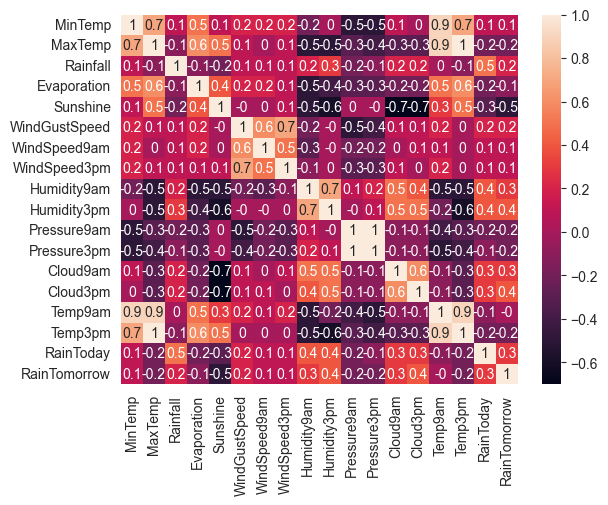

In [105]:
#We can visualize this correlation matrix
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

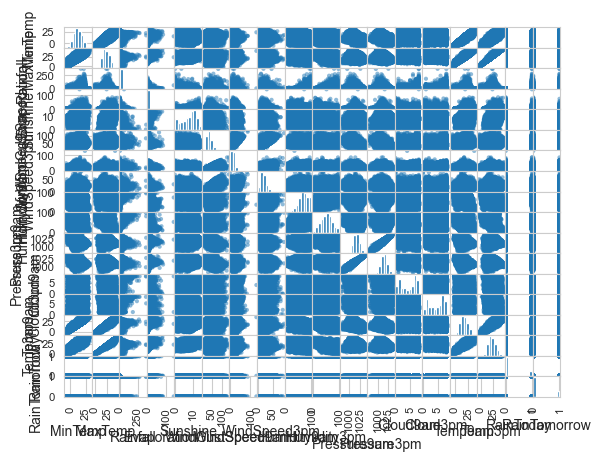

In [98]:
#Another visualization of how each of attribute affect others
from pandas.plotting import scatter_matrix
scatter_matrix(rain_df)
plt.show()

3) VISUALIZATION OF DATASET

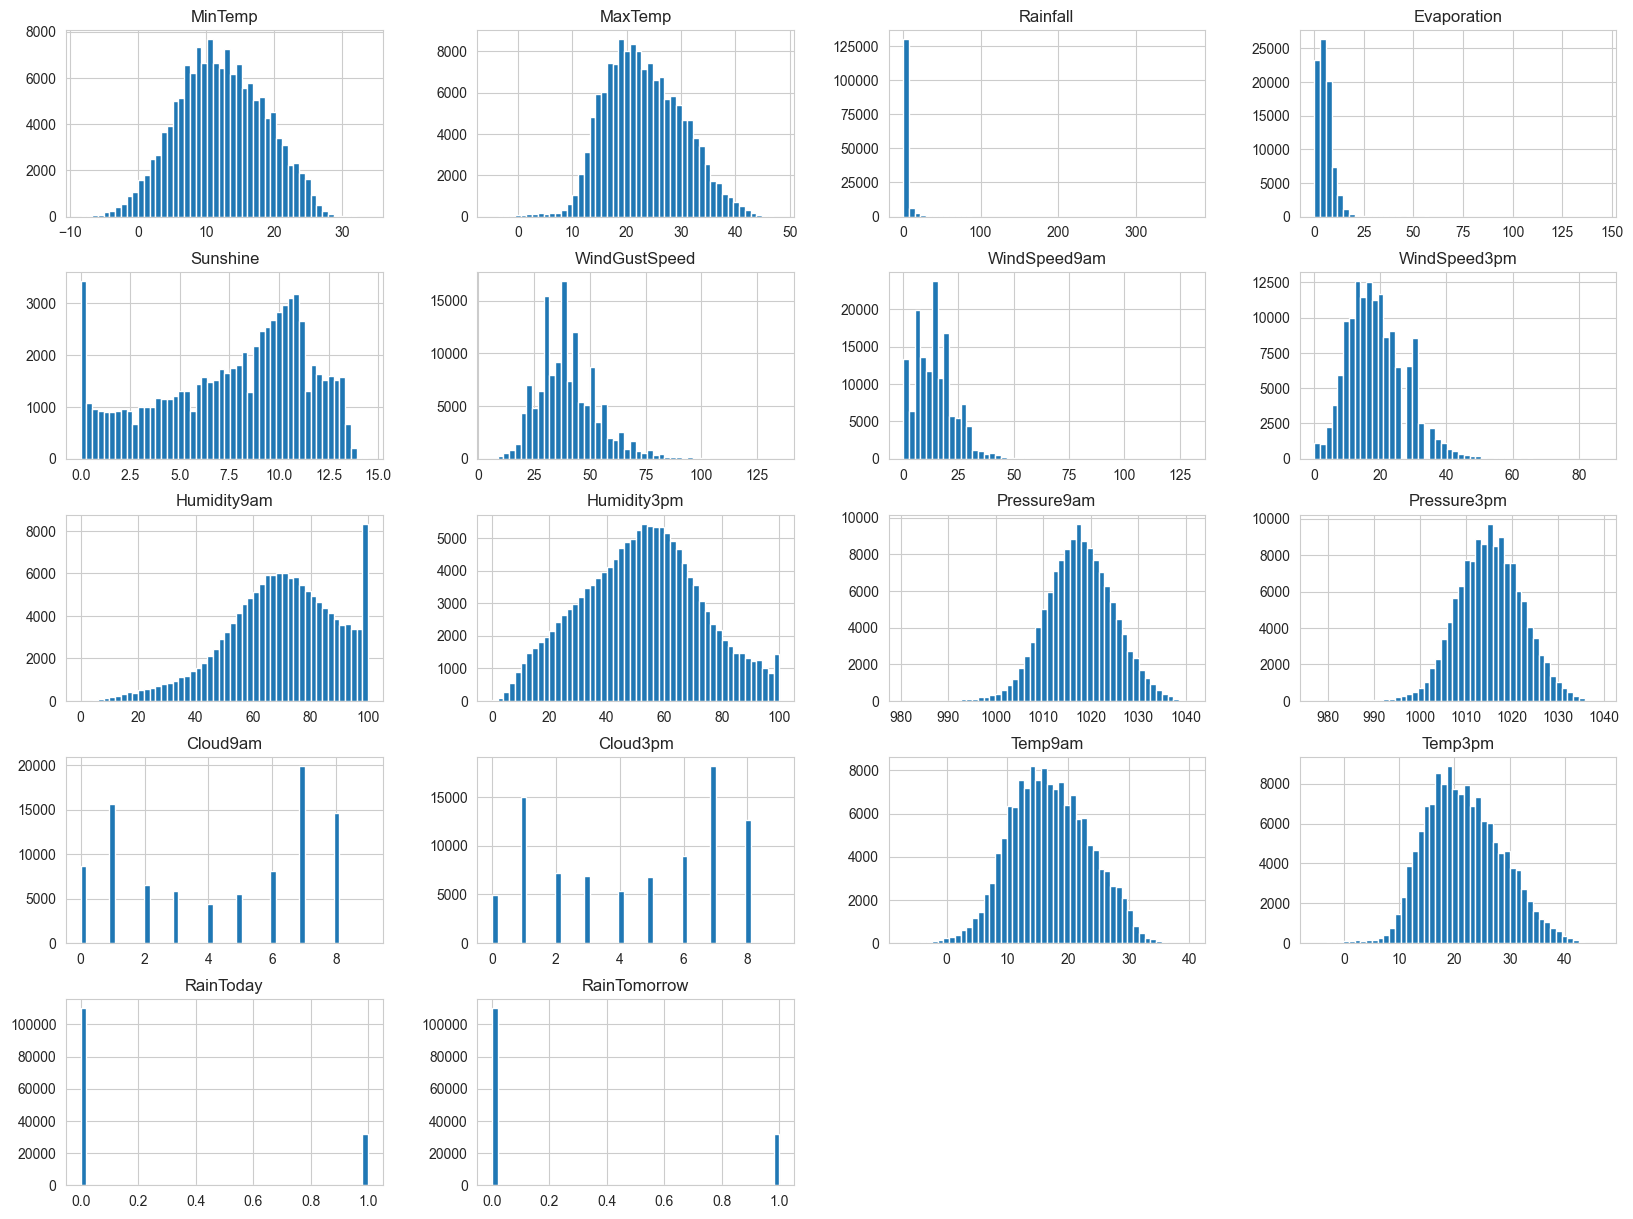

In [99]:
#Histogram of each attribute
import matplotlib.pyplot as plt
rain_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: BMI, Blood Pressure, Diabetes Pedigree Function and skin thickness have a quite normal distribution

However, more importantly, the regconition of some attribute has null ('0') values, which is impossible in term of its indexes and might affect the analysis in future, such as: skin thickness, insulin, glucose, blood pressure... So we have to processed those data for better understanding

# II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH NULL VALUES

The technique we use here is replacing them with their median value

Our dealing target is BMI, Blood Pressure, Glucose, Insulin, Skin thickness

In [20]:
rain_df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [23]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [24]:
rain_df.shape

(145460, 23)

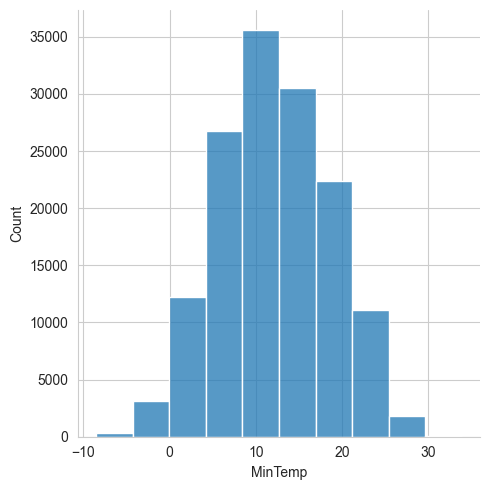

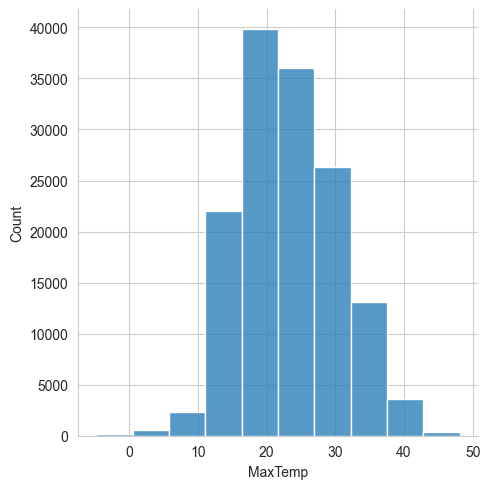

In [27]:
sns.set_style('whitegrid')
sns.displot(rain_df['MinTemp'],bins=10)
sns.displot(rain_df['MaxTemp'],bins=10)
#create two histograms using Seaborn with the 'whitegrid' style, one for the 'MinTemp' column and one for the 'MaxTemp' column, each with 10 bins.

<AxesSubplot:xlabel='MinTemp'>

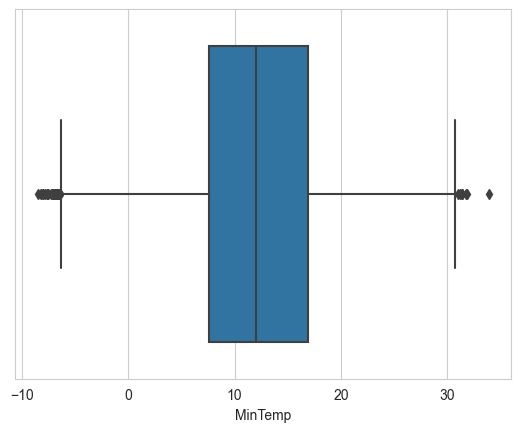

In [28]:
sns.boxplot(x = 'MinTemp' , data=rain_df)

<AxesSubplot:xlabel='MinTemp'>

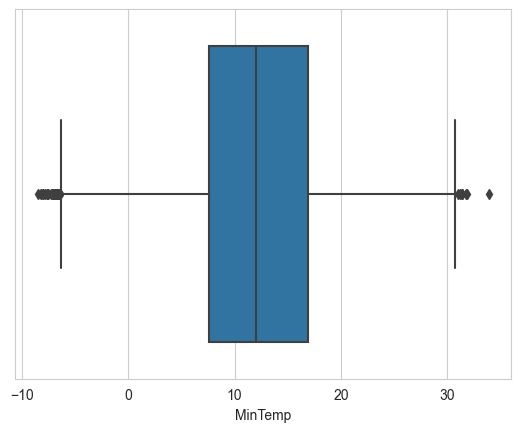

In [30]:
sns.boxplot(x='MaxTemp' , data=rain_df)

In [82]:
MinTemp_mean = round(rain_df['MinTemp'].mean(),2)

In [83]:
MaxTemp_mean = round(rain_df['MaxTemp'].mean(),2)

In [36]:
rain_df['MinTemp'].fillna(MinTemp_mean,inplace=True)
rain_df['MaxTemp'].fillna(MaxTemp_mean,inplace=True)
#These lines of code will replace the missing values in the 'MinTemp' and 'MaxTemp' columns of the rain_df DataFrame with their respective mean values

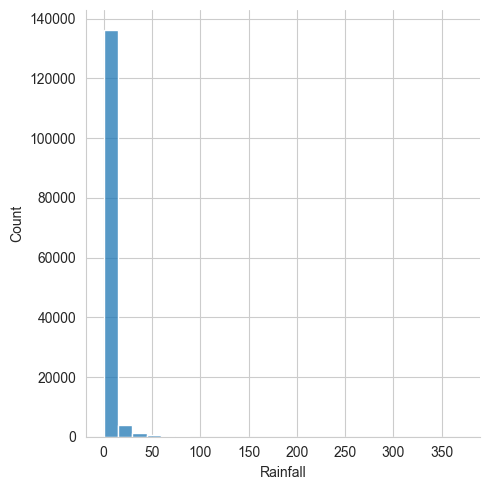

In [37]:
sns.displot(rain_df['Rainfall'],bins = 25)

In [38]:
rain_df['Rainfall'].value_counts()

0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: Rainfall, Length: 681, dtype: int64

In [39]:
rain_df['Rainfall'].mean()

2.3609181499166656

In [41]:
rain_df['Rainfall'].fillna(2.36 , inplace=True)

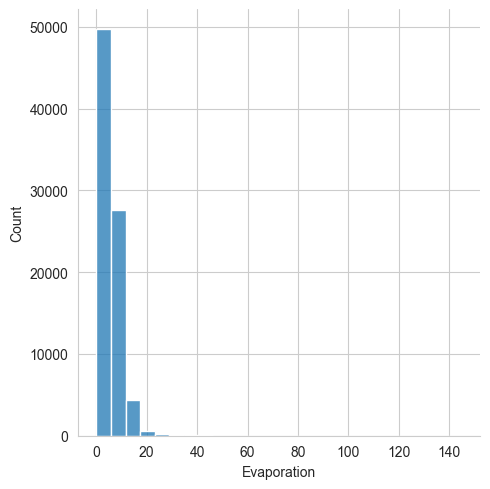

In [42]:
sns.displot(rain_df['Evaporation'] , bins = 25)

In [44]:
rain_df['Evaporation'].value_counts()

4.0     3339
8.0     2609
2.2     2095
2.0     2032
2.4     2003
        ... 
17.1       1
19.7       1
20.5       1
18.1       1
39.6       1
Name: Evaporation, Length: 358, dtype: int64

In [45]:
rain_df['Evaporation'].mean()

5.468231522922462

In [47]:
rain_df['Evaporation'].fillna(5.46,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

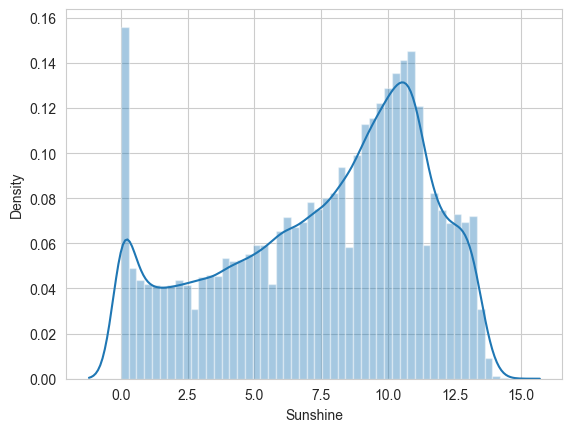

In [49]:
sns.distplot(rain_df['Sunshine'])
rain_df['Sunshine'].value_counts()

In [51]:
rain_df['Sunshine'].mean()

7.6111775206611565

In [54]:
rain_df['Sunshine'].fillna(7.61, inplace=True)

In [56]:
rain_df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [58]:
rain_df['WindGustDir'].fillna('W',inplace=True)

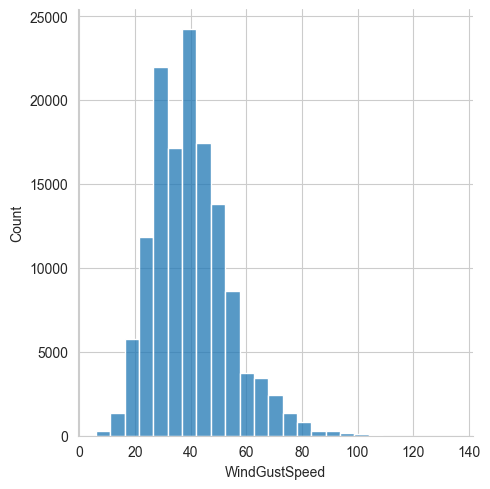

In [60]:
sns.displot(rain_df['WindGustSpeed'],bins = 25)

<AxesSubplot:xlabel='WindGustSpeed'>

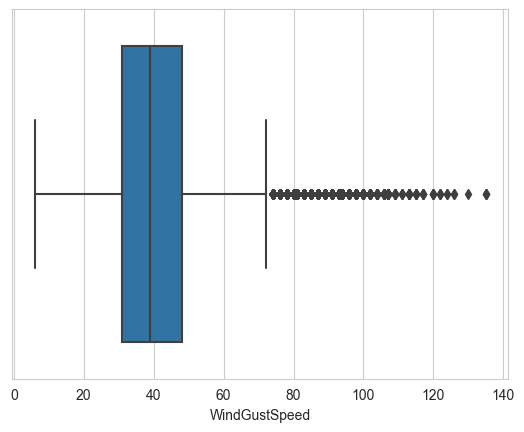

In [62]:
sns.boxplot(x='WindGustSpeed' ,data=rain_df)

In [64]:
rain_df['WindGustSpeed'].mean()

40.03523007167319

In [65]:
rain_df['WindGustSpeed'].fillna(40.03,inplace=True)

In [66]:
rain_df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [67]:
rain_df['WindDir9am'].fillna('N',inplace=True)

In [68]:
rain_df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [70]:
rain_df['WindDir3pm'].fillna('SE',inplace=True)

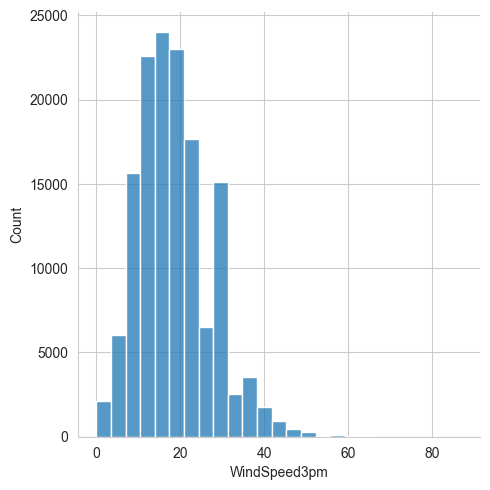

In [71]:
sns.displot(rain_df['WindSpeed3pm'],bins = 25)

In [73]:
rain_df['WindSpeed9am'].mean()

14.043425914971502

In [74]:
rain_df['WindSpeed9am'].fillna(14.04,inplace=True)

In [75]:
numerical_columns = [col for col in rain_df.columns if rain_df[col].dtype in ['float64','int64']]
numerical_df = rain_df[numerical_columns]

In [76]:
numerical_df.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [77]:
col_with_missing = [col for col in numerical_df.columns if numerical_df[col].isnull().any()]
col_with_missing

['WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [78]:
for col in col_with_missing:
    numerical_df[col+'_was_missing'] = numerical_df[col].isnull()
numerical_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,WindSpeed3pm_was_missing,Humidity9am_was_missing,Humidity3pm_was_missing,Pressure9am_was_missing,Pressure3pm_was_missing,Cloud9am_was_missing,Cloud3pm_was_missing,Temp9am_was_missing,Temp3pm_was_missing
0,13.4,22.9,0.6,5.46,7.61,44.00,20.0,24.0,71.0,22.0,...,21.8,False,False,False,False,False,False,True,False,False
1,7.4,25.1,0.0,5.46,7.61,44.00,4.0,22.0,44.0,25.0,...,24.3,False,False,False,False,False,True,True,False,False
2,12.9,25.7,0.0,5.46,7.61,46.00,19.0,26.0,38.0,30.0,...,23.2,False,False,False,False,False,True,False,False,False
3,9.2,28.0,0.0,5.46,7.61,24.00,11.0,9.0,45.0,16.0,...,26.5,False,False,False,False,False,True,True,False,False
4,17.5,32.3,1.0,5.46,7.61,41.00,7.0,20.0,82.0,33.0,...,29.7,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,5.46,7.61,31.00,13.0,11.0,51.0,24.0,...,22.4,False,False,False,False,False,True,True,False,False
145456,3.6,25.3,0.0,5.46,7.61,22.00,13.0,9.0,56.0,21.0,...,24.5,False,False,False,False,False,True,True,False,False
145457,5.4,26.9,0.0,5.46,7.61,37.00,9.0,9.0,53.0,24.0,...,26.1,False,False,False,False,False,True,True,False,False
145458,7.8,27.0,0.0,5.46,7.61,28.00,13.0,7.0,51.0,24.0,...,26.0,False,False,False,False,False,False,False,False,False


In [79]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(numerical_df))

imputed_X.columns = numerical_df.columns
imputed_X

#fill missing values 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,WindSpeed3pm_was_missing,Humidity9am_was_missing,Humidity3pm_was_missing,Pressure9am_was_missing,Pressure3pm_was_missing,Cloud9am_was_missing,Cloud3pm_was_missing,Temp9am_was_missing,Temp3pm_was_missing
0,13.4,22.9,0.6,5.46,7.61,44.00,20.0,24.0,71.0,22.0,...,21.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,5.46,7.61,44.00,4.0,22.0,44.0,25.0,...,24.3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,12.9,25.7,0.0,5.46,7.61,46.00,19.0,26.0,38.0,30.0,...,23.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9.2,28.0,0.0,5.46,7.61,24.00,11.0,9.0,45.0,16.0,...,26.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,17.5,32.3,1.0,5.46,7.61,41.00,7.0,20.0,82.0,33.0,...,29.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,5.46,7.61,31.00,13.0,11.0,51.0,24.0,...,22.4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
145456,3.6,25.3,0.0,5.46,7.61,22.00,13.0,9.0,56.0,21.0,...,24.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
145457,5.4,26.9,0.0,5.46,7.61,37.00,9.0,9.0,53.0,24.0,...,26.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
145458,7.8,27.0,0.0,5.46,7.61,28.00,13.0,7.0,51.0,24.0,...,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
imputed_X.isnull().sum()

MinTemp                     0
MaxTemp                     0
Rainfall                    0
Evaporation                 0
Sunshine                    0
WindGustSpeed               0
WindSpeed9am                0
WindSpeed3pm                0
Humidity9am                 0
Humidity3pm                 0
Pressure9am                 0
Pressure3pm                 0
Cloud9am                    0
Cloud3pm                    0
Temp9am                     0
Temp3pm                     0
WindSpeed3pm_was_missing    0
Humidity9am_was_missing     0
Humidity3pm_was_missing     0
Pressure9am_was_missing     0
Pressure3pm_was_missing     0
Cloud9am_was_missing        0
Cloud3pm_was_missing        0
Temp9am_was_missing         0
Temp3pm_was_missing         0
dtype: int64

In [108]:
rain_df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [ ]:
#Fill the rain_df

In [110]:
categories_col = [col for col in rain_df.columns if rain_df[col].dtype=='object']

In [ ]:
categories_col

In [ ]:
numerical_df

In [ ]:
plt.figure(figsize=(16,6))
plt.hist('MinTemp' , data=numerical_df , bins = 25)
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.hist('MaxTemp' , data=numerical_df , bins = 25)
plt.show()

In [ ]:
plt.hist('Humidity3pm_was_missing' , data= imputed_X , bins = 2)
plt.show()

2) DEALING WITH OUTLIERS

The technique we use here is removing them all from the dataset as they might have negative impact on the classification model

The below codes follow this logic:

1. Visualize the distribution of the variable using a histogram and a boxplot. We use the plotvariable() function to create these visualizations for each variable of interest ('Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm') in our dataframe rain_df.

2. Calculate the upper and lower limits for identifying outliers. In our code, we are using the find_boundaries() function to calculate the upper and lower limits for the 'Rainfall' variable, and storing them in the variables upper_rainfall and lower_rainfall

3. Identify the outliers based on the calculated upper and lower limits. We are using the np.where() function to create a boolean array outliers_rainfall that indicates whether each data point in the 'Rainfall' variable is an outlier or not, based on the upper and lower limits.

4. Handle the outliers. In our code, we are using boolean indexing to create a new dataframe eng_d that includes only the rows where the 'Rainfall' values are not identified as outliers, based on the outliers_rainfall boolean array.

5. Repeat the above steps for each variable of interest ('Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm') in your dataframe rain_df

In [15]:
def find_boundaries(rain_df, variables):
    
    Q1=rain_df[variables].quantile(0.25)
    Q3=rain_df[variables].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary
#  the find_boundaries() function calculates the lower and upper boundaries for identifying outliers in a 
#     variable by using the values of the 25th and 75th percentiles (Q1 and Q3) and the interquartile range (IQR).

In [16]:
rain_df.columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,30.5,33.6,50,0.627,1
1,1,85,66,29,30.5,26.6,31,0.351,0
2,8,183,64,23,30.5,23.3,32,0.672,1
3,1,89,66,23,94.0,28.1,21,0.167,0
5,5,116,74,23,30.5,25.6,30,0.201,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,63,0.171,0
764,2,122,70,27,30.5,36.8,27,0.340,0
765,5,121,72,23,112.0,26.2,30,0.245,0
766,1,126,60,23,30.5,30.1,47,0.349,1


In [ ]:
def plotvariable(rain_df, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(rain_df[variable], alpha=0.5)
    
    plt.subplot(1,2,2)
    sns.boxplot(rain_df[variable])
    plt.show
# The plotvariable() function takes two arguments as input: rain_df, which is a dataframe, and variable, 
# which is a string representing the name of the variable to be plotted.



In [ ]:
plotvariable(rain_df, 'Rainfall')
plotvariable(rain_df, 'Evaporation')
plotvariable(rain_df, 'WindGustSpeed')
plotvariable(rain_df, 'WindSpeed9am')
plotvariable(rain_df, 'WindSpeed3pm')

In [ ]:
lower_rainfall, upper_rainfall = find_boundaries(rain_df, 'Rainfall')
print('upper limit for rainfall area is', upper_rainfall)
print('lower limit for rainfall area is', lower_rainfall)
# The code calculates the lower and upper boundaries for outlier detection for the 'Rainfall' 
# variable in the dataframe rain_df using the find_boundaries() function.

In [ ]:
outliers_rainfall = np.where(rain_df['Rainfall'] > upper_rainfall, True,
                            np.where(rain_df['Rainfall'] < lower_rainfall, True, False))
# The code creates a boolean mask outliers_rainfall to identify potential outliers for the 'Rainfall' variable in the rain_df dataframe.

In [ ]:
outliers_rainfall

In [ ]:
rain_df.shape

In [ ]:
eng_d = rain_df.loc[~(outliers_rainfall),]
# The code creates a new dataframe eng_d by indexing the rain_df dataframe with a boolean mask ~(outliers_rainfall),
#  which is the negation of the outliers_rainfall boolean mask

In [ ]:
eng_d.shape

In [ ]:
lower_evaporation, upper_evaporation = find_boundaries(rain_df, 'Evaporation')
print('upper limit for evaporation area is', upper_evaporation)
print('lower limit for evaporation area is', lower_evaporation)

In [ ]:
outliers_evaporation = np.where(rain_df['Evaporation'] > upper_evaporation, True,
                               np.where(rain_df['Evaporation'] < lower_evaporation,True,False))

In [ ]:
outliers_evaporation

In [ ]:
rain_df.shape

In [ ]:
eng_e = rain_df.loc[~(outliers_evaporation),]

In [ ]:
eng_e.shape

In [ ]:
lower_wgustspeed, upper_wgustspeed = find_boundaries(rain_df, 'WindGustSpeed')
print('upper limit for wgustspeed area is', upper_wgustspeed)
print('lower limit for whustspeed area is', lower_wgustspeed)

In [ ]:
outliers_wgustspeed = np.where(rain_df['WindGustSpeed'] > upper_wgustspeed, True,
                               np.where(rain_df['WindGustSpeed'] < lower_wgustspeed,True,False))

In [ ]:
outliers_wgustspeed

In [ ]:
rain_df.shape

In [ ]:
eng_wg = rain_df.loc[~(outliers_wgustspeed),]

In [ ]:
eng_wg.shape

In [ ]:
lower_wspeed, upper_wspeed = find_boundaries(rain_df, 'WindSpeed9am')
print('upper limit for windspeed area is', upper_wspeed)
print('lower limit for windspeed area is', lower_wspeed)

In [ ]:
outliers_wspeed = np.where(rain_df['WindSpeed9am'] > upper_wspeed, True,
                               np.where(rain_df['WindSpeed9am'] < lower_wspeed,True,False))

In [ ]:
outliers_wspeed

In [ ]:
rain_df.shape

In [ ]:
eng_ws = rain_df.loc[~(outliers_wspeed),]

In [ ]:
eng_ws.shape

In [ ]:
lower_wspeedp, upper_wspeedp = find_boundaries(rain_df, 'WindSpeed3pm')
print('upper limit for windspeed3pm area is', upper_wspeedp)
print('lower limit for windspeed3pm area is', lower_wspeedp)
outliers_wspeedp = np.where(rain_df['WindSpeed3pm'] > upper_wspeedp, True,
                               np.where(rain_df['WindSpeed3pm'] < lower_wspeedp,True,False))

In [ ]:
outliers_wspeedp

In [ ]:
eng_wsp = rain_df.loc[~(outliers_wspeedp),]

In [ ]:
eng_wsp.shape

In [ ]:
plotvariable(eng_d, 'Rainfall')
plotvariable(eng_e, 'Evaporation')
plotvariable(eng_wg, 'WindGustSpeed')
plotvariable(eng_ws, 'WindSpeed9am')
plotvariable(eng_wsp, 'WindSpeed3pm')

As the result, there are only 719 attribute vectors left, there are 49 datapoints that do not meet standards, are classified as extreme outliers and removed from the  dataset (6.4% reduction)

In order to avoid miss-indexing, we have to reset index of new dataset

In [17]:
#Create an index array
index=pd.Index([i for i in range(719)])
#Reset the index of dataframe
rain_df.index=index

In [18]:
#Check the dataset reset 
rain_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,30.5,33.6,50,0.627,1
1,1,85,66,29,30.5,26.6,31,0.351,0
2,8,183,64,23,30.5,23.3,32,0.672,1
3,1,89,66,23,94.0,28.1,21,0.167,0
4,5,116,74,23,30.5,25.6,30,0.201,0
...,...,...,...,...,...,...,...,...,...
714,10,101,76,48,180.0,32.9,63,0.171,0
715,2,122,70,27,30.5,36.8,27,0.340,0
716,5,121,72,23,112.0,26.2,30,0.245,0
717,1,126,60,23,30.5,30.1,47,0.349,1


3) FEATURE SCALING

Look back to the statistical description of dataframe

In [19]:
rain_stats=rain_df.describe().round(decimals=2)
rain_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
count,719.00,719.00,719.00,719.00,719.00,719.00,719.00,719.00,719.00
mean,3.84,120.02,72.27,26.88,83.24,32.13,32.92,0.45,0.34
std,3.28,29.64,11.33,8.55,77.21,6.47,11.31,0.28,0.47
min,0.00,44.00,38.00,7.00,15.00,18.20,21.00,0.08,0.00
25%,1.00,99.00,64.00,23.00,30.50,27.40,24.00,0.24,0.00
50%,3.00,115.00,72.00,23.00,30.50,32.00,29.00,0.36,0.00
75%,6.00,138.00,80.00,32.00,120.00,36.10,40.00,0.60,1.00
max,13.00,199.00,108.00,54.00,402.00,52.90,68.00,1.46,1.00


It's obvious that whereas some features have remarkably higher range as: insulin, glucose,... compared to pregnancies are just ranging from 0 to 13. This difference might affect classification depends on distance such as KNeighbor. Moreover, some learning algorithms don't work very well if the features have a different set of values. For this reason we need to apply a proper scaling system.

The scaling system we choose here is Standardization

In [20]:
#Normalize data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
scaler.fit(rain_df.iloc[:,:8])
rain_scaled = scaler.transform(rain_df.iloc[:,:8])

In [21]:
#Scaled values become a 2D array
rain_scaled

array([[ 0.65875016,  0.94471568, -0.02395982, ...,  0.22664342,
         1.51108259,  0.62910294],
       [-0.8671563 , -1.18205666, -0.5540247 , ..., -0.8552006 ,
        -0.17007217, -0.34756579],
       [ 1.26911274,  2.12625587, -0.730713  , ..., -1.36521278,
        -0.08159034,  0.78834241],
       ...,
       [ 0.35356887,  0.03324182, -0.02395982, ..., -0.91702026,
        -0.258554  , -0.7226632 ],
       [-0.8671563 ,  0.20203328, -1.08408958, ..., -0.31427859,
         1.2456371 , -0.3546431 ],
       [-0.8671563 , -0.91199033, -0.20064811, ..., -0.26791385,
        -0.8779268 , -0.47495736]])

In [22]:
#Return this 2D array back to dataframe, however the 'outcome' column is removed
rain_scaled_df = pd.DataFrame(rain_scaled)

In [23]:
#Add the target column(outcome)
rain_scaled_df['Outcome']=rain_df['Outcome']

In [24]:
#Return the original names of these columns
rain_scaled_df.columns=rain_df.columns

In [25]:
#DataFrame showing
rain_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,0.658750,0.944716,-0.023960,0.950543,-0.683459,0.226643,1.511083,0.629103,1
1,-0.867156,-1.182057,-0.554025,0.248378,-0.683459,-0.855201,-0.170072,-0.347566,0
2,1.269113,2.126256,-0.730713,-0.453787,-0.683459,-1.365213,-0.081590,0.788342,1
3,-0.867156,-1.047023,-0.554025,-0.453787,0.139505,-0.623377,-1.054890,-0.998678,0
4,0.353569,-0.135550,0.152728,-0.453787,-0.683459,-1.009750,-0.258554,-0.878364,0
...,...,...,...,...,...,...,...,...,...
714,1.879475,-0.641924,0.329417,2.471901,1.254071,0.118459,2.661346,-0.984524,0
715,-0.561975,0.067000,-0.200648,0.014323,-0.683459,0.721201,-0.523999,-0.386491,0
716,0.353569,0.033242,-0.023960,-0.453787,0.372787,-0.917020,-0.258554,-0.722663,0
717,-0.867156,0.202033,-1.084090,-0.453787,-0.683459,-0.314279,1.245637,-0.354643,1


In [26]:
#The following code checks whether any instances in 'Outcome' attribute is NaN caused by miss-indexing
rain_scaled_df.Outcome.isnull().any()

False

As we can see now all the attributes (except the target column) are successfully standardized (ranging from -1 to 1)

# III) TESTING MULTIPLE MODELS

1) SPLITTING THE DATASET INTO TRAIN AND TEST SET

In this case, we want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

In [27]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(dia_scaled,dia_df.Outcome,test_size=0.25,random_state=5)

2) BUILDING AND TESTING MODELS

Right now, we didnot know which model is the best for our classification, we train and test each of them

To avoid overfitting, we split the dataset into many different folds for training and testing

In [28]:
#Import all the learning algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
#Import some utilities of sklearn to compare algorithms
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [30]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

In [31]:
# Prepare an array with all the algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [32]:
#Evaluate each model in turn
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.801537(0.045943)
CARD:0.708910(0.043815)
KNN:0.775507(0.050682)
LDA:0.810832(0.043413)
NB:0.779315(0.048975)
SVM:0.783054(0.063883)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

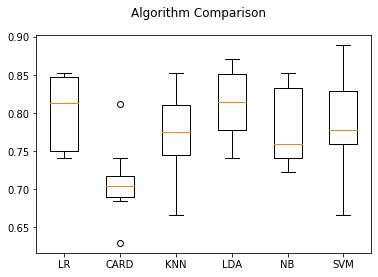

In [33]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, the most performant algorithm is Logistic Regression and Linear Discriminant Analysis, those 2 are likely to have equal efficiency (81% vs 80%)

ROC CURVE FOR COMPARISON

In [34]:
#Define x and y axis
x = dia_df.drop(axis = 'columns', columns = 'Outcome')
y_true = np.array(dia_df['Outcome'])

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

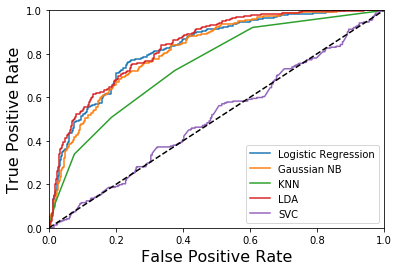

<Figure size 720x432 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

In [45]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, x, y_true, method='decision_function',cv=10)

fpr, tpr, threshold = roc_curve(y_true,y_score_lr)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnbc = GaussianNB()
gnbc.fit(x,y_true)
gnbc_results = cross_val_score(gnbc,x,y_true,scoring='accuracy')
y_score_gnb = cross_val_predict(gnbc,x,y_true,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])

# SVC
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='predict_proba',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc[:,1])

# ROC Curve for the models above
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_gnb, tpr_gnb,label='Gaussian NB')
plt.plot(fpr_knn, tpr_knn,label='KNN')
plt.plot(fpr_lda, tpr_lda,label='LDA')
plt.plot(fpr_svc, tpr_svc,label='SVC')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()
plt.show

In [49]:
from sklearn.metrics import roc_auc_score
print ('AUC of Logistic Regression:',roc_auc_score(y_true,y_score_lr))
print ('AUC of GaussianNB:',roc_auc_score(y_true,y_score_gnb[:,1]))
print ('AUC of KNeighborsClassifier:',roc_auc_score(y_true,y_score_knn[:,1]))
print ('AUC of Linear Discriminant Analysis:',roc_auc_score(y_true,y_score_lda[:,1]))
print ('AUC of Support Vector Machine:',roc_auc_score(y_true,y_score_svc[:,1]))

AUC of Logistic Regression: 0.8279103210492575
AUC of GaussianNB: 0.8179479182909716
AUC of KNeighborsClassifier: 0.7451877263198019
AUC of Linear Discriminant Analysis: 0.8388689640833723
AUC of Support Vector Machine: 0.5047906162828976


It looks like that using this comparison method, the most performant algorithm is Logistic Regression and Linear Discriminant Analysis, those 2 are likely to have equal efficiency (82.8% vs 83.9%)

# IV) BUILDING THE BEST MODEL FOR PREDICTION

1) ANALYSIS OF 2 MODELS: LOGISTIC REGRESSION AND LINEAR DISCRIMINANT ANALYSIS

The following confusion matrices and classification reports will give you a brief overview of th 2 most effective models 

**** CONFUSION MATRIX ****

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


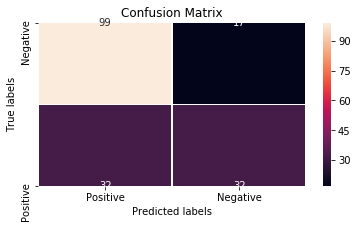

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
predictions1=lr.predict(X_test)
cm1=confusion_matrix(Y_test,predictions1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [71]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions1).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 32 ; False Positive: 17 ; True Negative: 99 ; False Negative 32


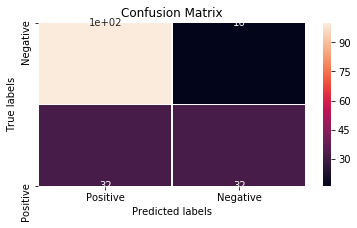

In [102]:
#Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions2=lda.predict(X_test)
cm2=confusion_matrix(Y_test,predictions2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [74]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 32 ; False Positive: 16 ; True Negative: 100 ; False Negative 32


**** CLASSIFICATION REPORT ****

In [105]:
from sklearn.metrics import confusion_matrix
#Logistic Regression
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.65      0.50      0.57        64

    accuracy                           0.73       180
   macro avg       0.70      0.68      0.68       180
weighted avg       0.72      0.73      0.72       180



In [104]:
#Linear Discriminant Analysis
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.67      0.50      0.57        64

    accuracy                           0.73       180
   macro avg       0.71      0.68      0.69       180
weighted avg       0.73      0.73      0.72       180



2) FINDING THE BEST MODEL BY GRIDSEARCH

# A- Linear Discriminant Analysis

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'solver': ['svd', 'lsqr', 'eigen']
}

model_lda= LinearDiscriminantAnalysis()

grid_search1 = GridSearchCV(
    model_lda, param_grid1, cv=10, scoring='accuracy')
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

The parameter above is the best parameter for LinearDiscriminantAnalysis model, we will use it the build the model

In [186]:
# Print the bext score found
grid_search1.best_score_

0.8033395176252319

# B-Logistic Regression

a) Penalty testing - advoid overfitting

In [187]:
#RIDGE REGRESSION (L2 PENALTY)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters= {'alpha':[2,4,6,8,10]}
ridge_reg=GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,Y_train)
print("The best parameter is:",ridge_reg.best_params_)
print("The best score for this penalty is",ridge_reg.best_score_)

The best parameter is: {'alpha': 10}
The best score for this penalty is -0.14910068234386678


In [188]:
#LASSO REGRESSION (L1 PENALTY)
from sklearn.linear_model import Lasso

parameters= {'alpha':[2,4,6,8,10]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(X_train,Y_train)
print("The best parameter is:",lasso_reg.best_params_)
print('The best score for this penalty is: ',lasso_reg.best_score_)

The best parameter is: {'alpha': 2}
The best score for this penalty is:  -0.22171905612198348


The above testing points out that the L2 penalty with alpha=10 would be more effective for our model (-0.22<-0.15)

b) Best parameter for Logistic Regression

In [193]:
param_grid2 = {
    'penalty':['l2'],
    'C':[1.0,10.0,50.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

model_lr= LogisticRegression()

grid_search2 = GridSearchCV(
    model_lr, param_grid2, cv=10, scoring='accuracy')
grid_search2.fit(X_train, Y_train)
print("The best score for this model is",grid_search2.best_score_)

The best score for this model is 0.8033395176252319


Since 2 models: Linear Discriminant Analysis and Logistic Regression with optimized parameter have the same best accuracy score, we can build either one of them for our prediction

3) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN IT

We choose Logistic Regression with L2 penalty and compatable parameter computed above

In [198]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
lr = grid_search2.best_estimator_

In [199]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [200]:
# Train the model
lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

4) MODIFY THE THRESHOLD

In [161]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(Y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = (2*recall*precision)/(recall+precision)
        if recall>=0.9 and f1>=0.7:
            bestthresh.append(threshold)
    return bestthresh

This function will return a list of best thresholds for our model. We want to obtain only threshold with recall>=0.9 and f1>=0.7, which can not only maximize the recall, minimize the False Negative problem, but also balance the interrelation between recall and precision

In [162]:
print('Logistic Regression')
optimize_threshold(lr)

Logistic Regression


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__'

[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]

In [165]:
print('Linear Discriminant Analysis')
optimize_threshold(lda)

Linear Discriminant Analysis


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: i

[0.16, 0.17, 0.18, 0.19]

Now we just focus on ist of best threholds for Logistic Regression:[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
From the list, we can see optimized thresholds are ranging from 0.22 to 0.3, we pick the median/mean one, which is 0.26 for our model. Then if the probability belongs to '1' class is larger than 0.26, then a person is predicted to be positive with Type II diabete.

# V) MAKE PREDICTIONS

In [167]:
# We create a new (fake) person infomation
new_data = pd.DataFrame([[3, 120, 72, 10, 200, 30, 30,0.4]])
# We scale those values like the others
new_data_scaled = scaler.transform(new_data)

In [172]:
# We modify the threshold
prediction = lr.predict_proba(new_data_scaled)[:,1]

In [171]:
# A value of "1" means that this person is likely to have type 2 diabetes
if prediction > 0.26:
    print("The person is positive with Type II diabetes")
else:
    print("The person is negative with Type II diabetes")

The person is negative with Type II diabetes


Prediction points out that this red with information:(3, 120, 72, 10, 200, 30, 30,0.4) (Pregnancy= 3 times, Glucose level= 120mg/dL, BloodPressure= 72mmHg, SkinThickness =10mm, Insulin level= 200mIU/L, BMI= 30, Age= 30 years, DiabetesPedigreeFunction= 0.4) is diagnosed 'negative' towards type II diabetes

In [176]:
#Define a function using the logic above for quicker and more convenient prediction:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict > 0.26:
        print("The person is positive with Type II diabetes")
    else:
        print("The person is negative with Type II diabetes")

**** Warning: The data passed in the function defined has to be a dataframe****

Let's check again with data of another person, using our function:

In [178]:
data=pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
prediction(data)

The person is positive with Type II diabetes


Our prediction model points out that this red with information: (6, 168, 72, 35, 0, 43.6, 0.627, 65) (Pregnancy= 6 times, Glucose level= 168mg/dL, BloodPressure= 72mmHg, SkinThickness =35mm, Insulin level= 0mIU/L, BMI= 43.6, Age= 65 years, DiabetesPedigreeFunction= 0.627) is diagnosed 'negative' towards type II diabetes

# VI) CONCLUSION

We finally find a score of 80.3% using Logistic Regression algorithm with Ridge Penalty and parameters optimisation. Please note that there may be still space for further analysis and optimisation. Training a machine learning model to solve a problem with a specific dataset is a test/fail/improve process. And according to our knowledge in Data Science subject until now, this is the best model achieved.

# ACKNOWLEDGEMENT

During project, there are a lot of things we were not clear about or having trouble dealing with machine learning techniques. Therefore, we want to express a huge gratefulness to listed but not limited sources that contribute to our success:

1) https://towardsdatascience.com

2) https://scikit-learn.org

3) https://pandas.pydata.org

4) https://www.datacamp.com

As well as many discussion forums, topics,... that give us a helping hand when encoutering many difficulties during this study.

# Special thank to our Data Science subject professor, Aditya Narvekar for the entirely amazing semester!!!